# Data Preparation for Causal Analysis in Machine Learning

## Abstract
Causal analysis in machine learning extends beyond correlation to uncover underlying cause-and-effect relationships, which are essential for making robust, generalizable predictions and actionable decisions. This chapter provides a detailed exploration of data preparation techniques tailored to support causal analysis, designed with graduate students in mind. We delve into foundational processes such as handling missing data, feature selection, and encoding categorical variables, contextualizing each within the principles of causality. Emphasis is placed on how these preprocessing steps impact the identification and interpretation of causal structures, ensuring that models are not only statistically sound but also causally valid. By the end of this chapter, readers will have a clear understanding of how to prepare data in a way that respects and enhances the causal inference process, setting the stage for accurate, interpretable, and ethical applications of machine learning in real-world scenarios.

## Foundational Concepts in Data Preparation for Causal Analysis

Understanding causality is a critical step toward building machine learning models that go beyond correlation to reveal cause-and-effect relationships. This section presents the foundational principles of causality and the data preprocessing techniques that ensure these relationships are accurately identified and interpreted. We will explore three primary areas: causality principles, handling missing data, feature selection, and encoding categorical variables, all within the context of causal analysis.

---

### 1. Causality Principles: A Brief Overview

Causality seeks to answer the question: *Does X cause Y?* Unlike correlation, which measures the statistical association between variables, causality involves a directional relationship where changes in one variable (the cause) produce changes in another (the effect). In machine learning, this distinction is essential for making decisions or predictions that align with real-world dynamics.

#### Key Concepts in Causality:
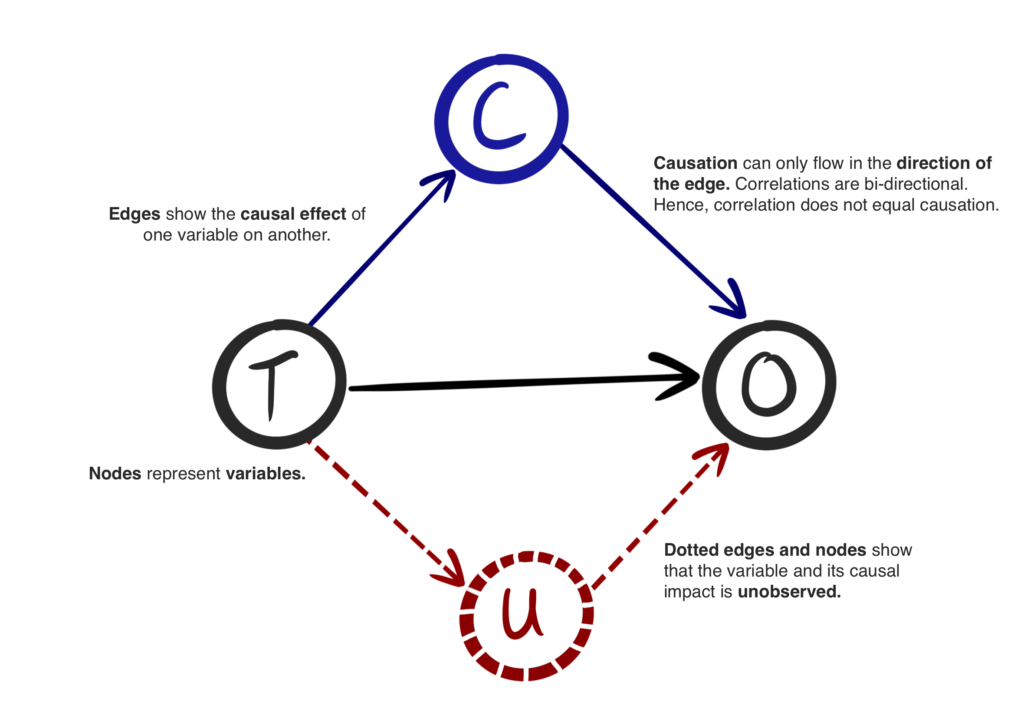
- **Causal Graphs:**  
  Represented as Directed Acyclic Graphs (DAGs), causal graphs illustrate relationships between variables. Nodes represent variables, and directed edges indicate causation.  
  Example:  
  ```plaintext
  X → Y → Z  
Here, X influences Y, and Y influences Z.

- **Confounding:**
Confounders are variables that affect both the cause and the effect, potentially biasing the observed relationship. Identifying and addressing confounding is crucial for causal analysis.

- **Interventions:**
An intervention involves actively changing a variable (e.g., through experiments or counterfactual analysis) to determine its causal effect on another variable.

- **Conditional Independence:**
In causal inference, understanding which variables are conditionally independent given others (e.g., via d-separation in DAGs) helps isolate true causal pathways.

### 2. Handling Missing Data
Missing data is a common challenge in machine learning, and improper handling can distort causal relationships. Addressing missing data within a causal framework requires thoughtful consideration of its underlying mechanisms.

#### Types of Missing Data:
1. **Missing Completely at Random (MCAR):**
Data is missing independently of any observed or unobserved variables.
Example: Sensor failure occurs randomly, not influenced by environmental conditions.

2. **Missing at Random (MAR):**
Missingness depends on observed data but not unobserved data.
Example: Income data missing based on education level but not on unobserved wealth.

3. **Missing Not at Random (MNAR):**
Missingness depends on unobserved data.
Example: High-income individuals are less likely to report their income.

#### Strategies for Handling Missing Data:
- **Deletion Methods:**

    - Suitable for MCAR data but risks losing valuable information.
    - Example: Listwise deletion removes rows with missing values.
- **Imputation Methods:**
    - **Mean/Median/Mode Imputation:** Replaces missing values with a summary statistic. Simple but risks bias.
    - **Multiple Imputation:** Creates multiple plausible datasets, fits models on each, and combines results for robustness.
    - **Model-Based Imputation:** Uses causal relationships to infer missing values (e.g., via Bayesian networks).
- **Causal Framework Considerations:**
Imputation should respect the causal relationships in the data. For example, imputing a cause variable based on its effect might introduce bias.

### 3. Feature Selection in Causal Analysis
Feature selection involves identifying the most relevant variables for a model. In causal analysis, this process also seeks to exclude variables that may confound or distort causal interpretations.

#### Goals of Feature Selection in Causality:
- **Include Causal Parents of the Outcome:** These variables directly influence the target variable.
- **Exclude Colliders:** Variables that are influenced by both the cause and the outcome. Conditioning on colliders can introduce bias.
Example: In a DAG where X → Y ← Z, conditioning on Y can create a spurious association between X and Z.

#### Techniques for Feature Selection:
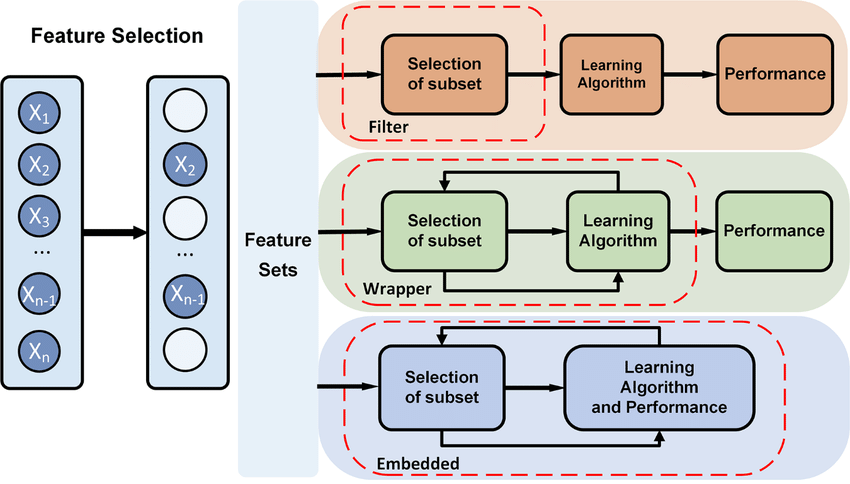
- **Filter Methods:**
Use statistical measures (e.g., mutual information) to rank variables. These methods are independent of the model but may miss causal nuances.

- **Wrapper Methods:**
Evaluate subsets of variables by training a model and assessing performance. Time-consuming but effective for causality when combined with causal discovery algorithms.

- **Embedded Methods:**
Perform feature selection during model training. For example, Lasso regression applies regularization to zero out less important features.

- **Causal Discovery Tools:**
Algorithms like PC, FCI, and LiNGAM help identify causal relationships and guide feature selection.

### 4. Encoding Categorical Variables
Categorical variables often require transformation into numerical formats for machine learning models. In causal analysis, this step should preserve causal information and avoid introducing biases.

#### Common Encoding Methods:

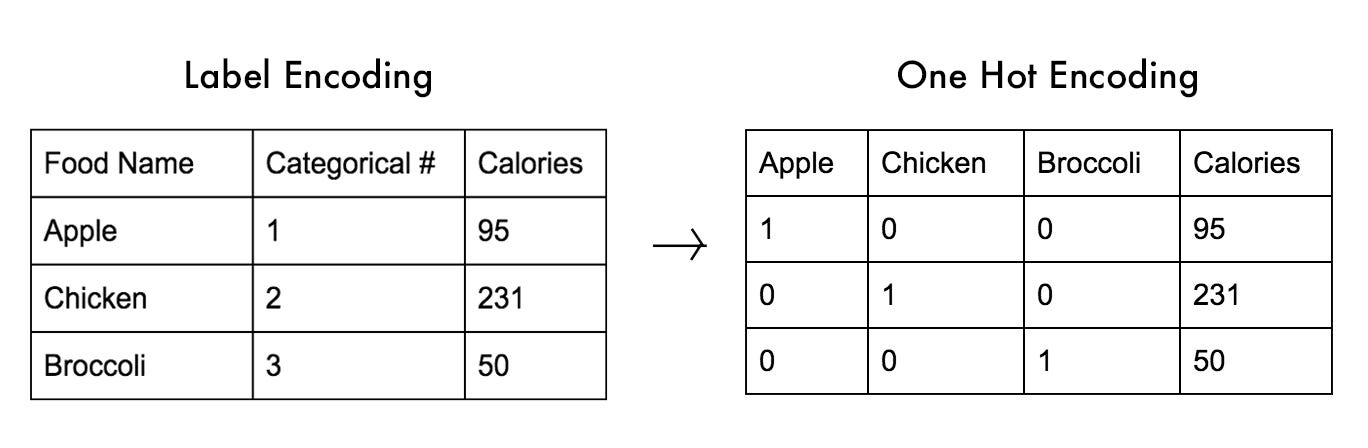

- **One-Hot Encoding:**
Converts each category into a binary column.
Example: "Color" with categories [Red, Green, Blue] becomes three binary columns.

- **Label Encoding:**
Assigns numerical values to categories. Simple but risks implying ordinal relationships where none exist.

- **Target Encoding:**
Maps categories to the mean target variable value within each category. Useful for high-cardinality features but requires careful validation to avoid data leakage.

#### Considerations for Causal Analysis:
- **Avoid Overfitting to Spurious Associations:**
Encoders like target encoding can accidentally encode confounders if not used carefully.

- **Respect Causal Structure:**
The choice of encoding should align with the causal role of the categorical variable. For instance, if the variable is a mediator, the encoding must preserve its intermediate role.

##  Dataset: Titanic
The Titanic dataset is ideal for causality analysis due to its diverse features, real-world relevance, and challenges with missing data. It allows exploration of causal relationships (e.g., how Pclass or Age affects survival) and demonstrates key preprocessing techniques like imputation and encoding. Its simplicity and accessibility make it perfect for teaching foundational concepts in causal inference.

In [223]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data_original = pd.read_csv(url)

# Display dataset info
print(titanic_data_original.info())
titanic_data_original.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handling Missing Data

The missing values in the Titanic dataset highlight common challenges in real-world data:

**Age (19.87% missing):** Missing data could be due to incomplete records or errors during data collection. Since age is crucial for survival analysis (e.g., "women and children first"), careful imputation is essential to avoid bias.

**Cabin (77.10% missing):** A large proportion of missing values suggests many passengers did not have cabin assignments (e.g., lower-class passengers) or records were not maintained. This feature may have limited utility unless encoded as "missing" or generalized (e.g., extracting deck information).

**Embarked (0.22% missing):** Minimal missing data likely reflects clerical errors. Since the missing proportion is very small, imputation with the most frequent value (mode) is suitable and won't significantly affect the analysis.

These missing values provide a practical context for applying deletion, imputation, and encoding techniques while considering their impact on causal interpretations.

In [202]:
titanic_data = titanic_data_original.copy()

# Identify missing data
missing_data = titanic_data.isnull().sum()
print("Missing Values:")
print(missing_data[missing_data > 0])

# Calculate percentage of missing data
missing_percentage = (missing_data / len(titanic_data)) * 100
print("\nPercentage of Missing Data:")
print(missing_percentage[missing_percentage > 0])

Missing Values:
Age         177
Cabin       687
Embarked      2
dtype: int64

Percentage of Missing Data:
Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [204]:
# Remove rows with missing values
titanic_cleaned_listwise = titanic_data.dropna()

# Display the percentage of data removed
print(f"Rows before deletion: {len(titanic_data)}")
print(f"Rows after deletion: {len(titanic_cleaned_listwise)}")

Rows before deletion: 891
Rows after deletion: 183


In [206]:
# Replace missing 'Age' with median
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

# Replace missing 'Embarked' with mode
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

# Replace missing Cabin values with "Missing"
titanic_data['Cabin'] = titanic_data['Cabin'].fillna('Missing')

# Display dataset after imputation
print(titanic_data[['Age', 'Embarked', 'Cabin']].isnull().sum())

Age         0
Embarked    0
Cabin       0
dtype: int64


#### Explanation
Handling the missing values in the Titanic dataset by employing simple and effective imputation techniques:

**Age (Numerical):** Missing values are replaced with the median of the Age column.
The median is robust to outliers and provides a reasonable estimate for a continuous variable like age.

**Embarked (Categorical):** Missing values are replaced with the mode (most frequent value) of the Embarked column.
Since only two rows are missing, this method effectively fills the gaps without altering the dataset's distribution.

**Cabin (Categorical):** Missing values are replaced with the string "Missing".

This approach acknowledges the high percentage of missing data (77%) and retains the feature for potential analysis (e.g., grouping or encoding).

In [194]:
titanic_data_imputer = titanic_data_original.copy()

# Identify numerical columns with missing values
numerical_features_with_missing = titanic_data_imputer[['Age']].columns

# Apply imputation only on missing-value columns
imputer = IterativeImputer(random_state=42)
titanic_data_imputed = pd.DataFrame(
    imputer.fit_transform(titanic_data_imputer[numerical_features_with_missing]),
    columns=numerical_features_with_missing
)

# Replace imputed values back into the dataset
titanic_data_imputer['Age'] = titanic_data_imputed['Age']

# Verify missing values
print(titanic_data_imputer.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


This code uses Iterative Imputer to fill missing values in the Age column of the Titanic dataset. It creates a copy of the original data, selects the column with missing values, applies iterative regression-based imputation to predict and replace missing values, and updates the dataset. Finally, it verifies that no missing values remain in the Age column.

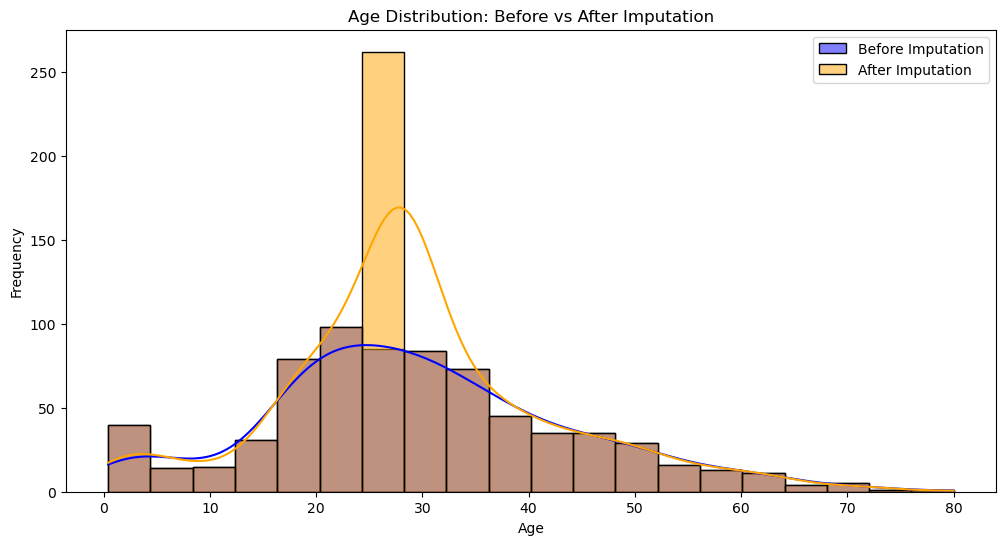

In [211]:
plt.figure(figsize=(12, 6))

# Plot Age before imputation
sns.histplot(titanic_data_original['Age'], bins=20, kde=True, color='blue', label='Before Imputation')

# Plot Age after imputation
sns.histplot(titanic_data['Age'], bins=20, kde=True, color='orange', label='After Imputation')

plt.title('Age Distribution: Before vs After Imputation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

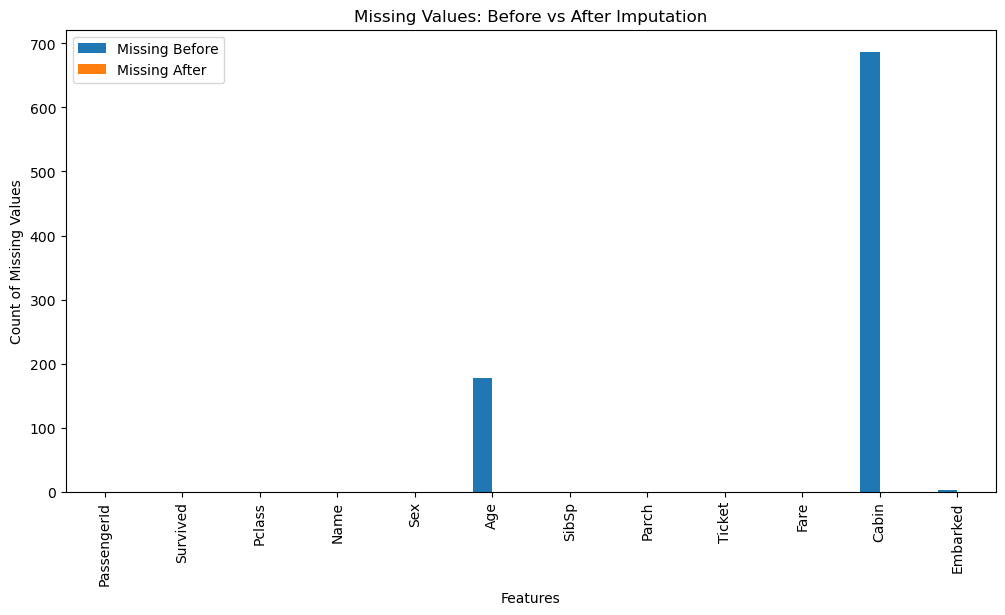

In [215]:
# Count missing values in both datasets
missing_before = titanic_data_original.isnull().sum()
missing_after = titanic_data.isnull().sum()

# Combine into a DataFrame
missing_comparison = pd.DataFrame({
    'Feature': titanic_data.columns,
    'Missing Before': missing_before,
    'Missing After': missing_after
}).set_index('Feature')

# Visualize missing values
missing_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Missing Values: Before vs After Imputation')
plt.ylabel('Count of Missing Values')
plt.xlabel('Features')
plt.show()

#### Graph 1: Age Distribution
This graph compares the distribution of the Age column before and after imputation.

**Before Imputation:** Missing values create gaps in the data, resulting in an incomplete distribution.

**After Imputation:** The distribution is filled, with imputed values primarily around the median or modeled estimates.
#### Graph 2: Missing Values
This bar chart shows the count of missing values for each feature before and after imputation.

**Before Imputation:** Significant missing values in Age, Cabin, and Embarked.

**After Imputation:** Missing values in Age and Embarked are resolved, while Cabin is still missing as it was handled separately.

### Feature Selection in Causal Analysis

We’ll identify relationships based on domain knowledge. For instance:

Exclude colliders: Variables influenced by both the cause (e.g., Sex) and the outcome (Survived), such as engineered features like FamilySize = SibSp + Parch

In [229]:
# Drop potential colliders or engineered variables if any
titanic_data = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')

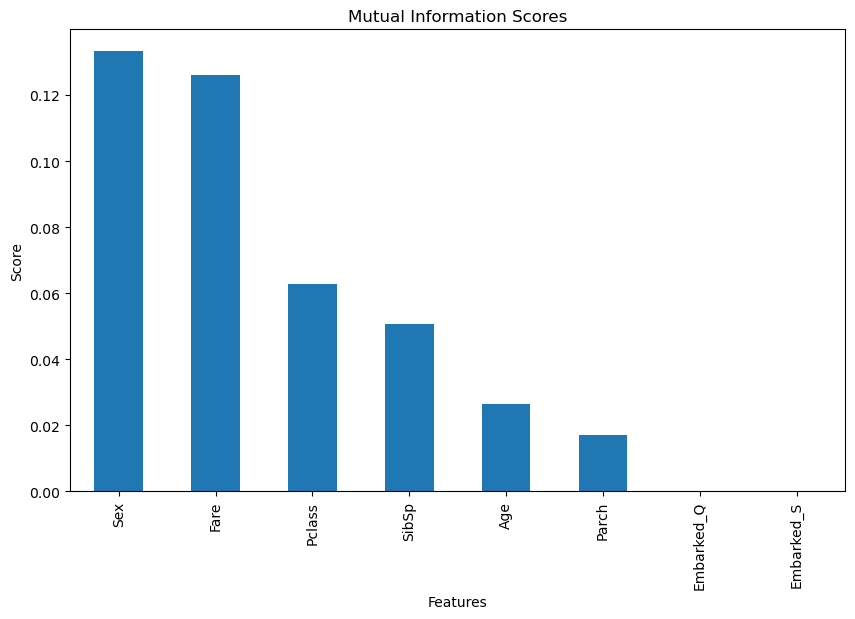

Top features selected by Mutual Information: ['Sex', 'Fare', 'Pclass', 'SibSp', 'Age', 'Parch']


In [234]:
# Encode categorical variables using one-hot encoding or mapping
titanic_data_encoded = titanic_data.copy()

# Map 'Sex' to numerical values
titanic_data_encoded['Sex'] = titanic_data_encoded['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
titanic_data_encoded = pd.get_dummies(titanic_data_encoded, columns=['Embarked'], drop_first=True)

# Define features and target
X = titanic_data_encoded.drop(columns=['Survived'])
y = titanic_data_encoded['Survived']

# Calculate mutual information scores
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Visualize mutual information scores
plt.figure(figsize=(10, 6))
mi_scores.plot(kind='bar')
plt.title('Mutual Information Scores')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

# Top features based on mutual information
top_features_mi = mi_scores[mi_scores > 0.01].index.tolist()
print("Top features selected by Mutual Information:", top_features_mi)

#### Graph Explanation
This graph shows the mutual information scores of features in the Titanic dataset with respect to the target variable, Survived.

**Top Features:**
- Sex and Fare have the highest scores, indicating they have the strongest relationship with survival.
- Pclass and SibSp also contribute significantly, but less than Sex and Fare.
- Age and Parch have moderate relevance.
- The features Embarked_Q and Embarked_S have the lowest scores, suggesting minimal contribution to survival.

In [236]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Recursive Feature Elimination (RFE) with Random Forest
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Selected features
top_features_rfe = X.columns[rfe.support_].tolist()
print("Top features selected by RFE:", top_features_rfe)

Top features selected by RFE: ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']


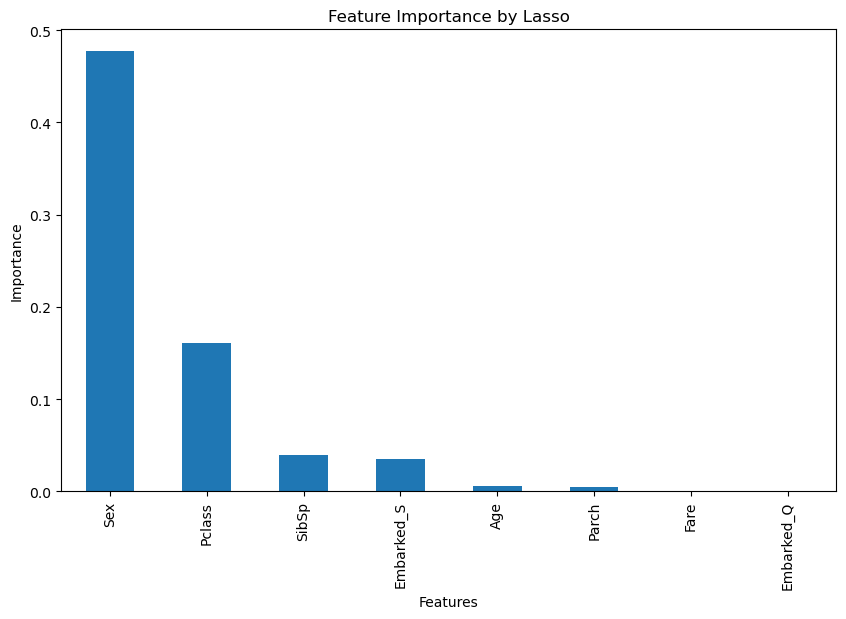

Top features selected by Lasso: ['Sex', 'Pclass', 'SibSp', 'Embarked_S']


In [238]:
# Apply Lasso for feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X, y)
importance = pd.Series(np.abs(lasso.coef_), index=X.columns).sort_values(ascending=False)

# Visualize Lasso-selected features
plt.figure(figsize=(10, 6))
importance.plot(kind='bar')
plt.title('Feature Importance by Lasso')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Top features selected by Lasso
top_features_lasso = importance[importance > 0.01].index.tolist()
print("Top features selected by Lasso:", top_features_lasso)

#### Graph Explanation
This graph shows feature importance determined by Lasso regression, which performs feature selection by applying regularization to shrink coefficients of less relevant features to zero.

Most Important Feature: Sex is the most influential feature with the highest importance, indicating a strong relationship with survival.
Other Relevant Features: Pclass, SibSp, and Embarked_S also contribute to survival prediction but to a lesser extent.
Irrelevant Features: Features like Age, Parch, Fare, and Embarked_Q are assigned near-zero importance, suggesting they contribute little to the prediction of survival in this model.

In [245]:
from dowhy import CausalModel

# Define a causal model
causal_model = CausalModel(
    data=titanic_data,
    treatment='Pclass',  # Example treatment
    outcome='Survived',
    common_causes=['Age', 'Sex', 'Fare', 'Embarked']  # Based on domain knowledge
)

# Identify causal effect
identified_estimand = causal_model.identify_effect()
print("Identified Estimand:", identified_estimand)

# Estimate causal effect
causal_estimate = causal_model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)
print("Causal Estimate:", causal_estimate)

Identified Estimand: Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                       
─────────(E[Survived|Embarked,Age,Sex,Fare])
d[Pclass]                                   
Estimand assumption 1, Unconfoundedness: If U→{Pclass} and U→Survived then P(Survived|Pclass,Embarked,Age,Sex,Fare,U) = P(Survived|Pclass,Embarked,Age,Sex,Fare)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Causal Estimate: *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                       
─────────(E[Survived|Embarked,Age,Sex,Fare])
d[Pclass]                                   
Estimand assumption 1, Unconfoundedness: If U→{Pclass} and U→Survived then P(Survived|Pclass,Embarked,Age,Sex,Fare,U) = P(Survived|

/opt/anaconda3/lib/python3.12/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


#### Output Explanation
This output from the DoWhy framework analyzes the causal effect of Pclass (treatment) on Survived (outcome), adjusted for confounders (Embarked, Age, Sex, Fare).

**Estimand:** The backdoor adjustment identifies the Average Treatment Effect (ATE), estimating the causal impact of Pclass on survival probability.

**Causal Estimate:** A one-unit increase in Pclass (e.g., moving to a lower class) reduces the probability of survival by ~18.4% (ATE = -0.184).

**Interpretation:** Higher classes (Pclass = 1) are positively associated with survival, reflecting better access to lifeboats/resources.

**Limitations:** The results assume no unobserved confounders and may require further validation through sensitivity or causal discovery analysis.

### Encoding Categorical Variables

One-hot encoding creates binary columns for each category, ensuring no unintended ordinal relationships. This is useful for variables like Embarked.

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# One-hot encode 'Embarked'
titanic_one_hot = titanic_data.copy()
titanic_one_hot = pd.get_dummies(titanic_one_hot, columns=['Embarked'], drop_first=True)

# Visualize one-hot encoded columns
print("One-hot Encoded Columns:")
print(titanic_one_hot[['Embarked_Q', 'Embarked_S']].head())

One-hot Encoded Columns:
   Embarked_Q  Embarked_S
0       False        True
1       False       False
2       False        True
3       False        True
4       False        True


Label encoding assigns numerical values to each category. This is simple but risks introducing ordinal assumptions, so it's suitable for variables like Sex with a natural binary distinction.

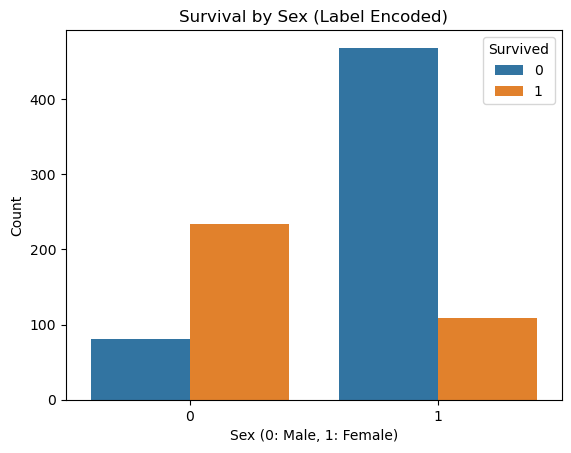

In [258]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'Sex'
titanic_label = titanic_data.copy()
label_encoder = LabelEncoder()
titanic_label['Sex'] = label_encoder.fit_transform(titanic_label['Sex'])

# Visualize label encoding
sns.countplot(data=titanic_label, x='Sex', hue='Survived')
plt.title("Survival by Sex (Label Encoded)")
plt.xlabel("Sex (0: Male, 1: Female)")
plt.ylabel("Count")
plt.show()

#### Graph Explanation

This bar chart shows the relationship between the label-encoded Sex feature and the Survived target variable.

**Key Points:**

- **Label Encoding:**

    - Sex has been encoded as 0 for males and 1 for females.

- **Survival Rates by Sex:**

    - Males (Sex = 0): Most male passengers did not survive (Survived = 0), indicating a lower survival rate.
    - Females (Sex = 1): A significant number of females survived (Survived = 1), showing a much higher survival rate compared to males.

- **Causal Insight:**

    - This aligns with the known fact that women were prioritized during evacuation, making Sex a critical feature for survival analysis.

Target encoding replaces categories with the mean target variable (Survived) for each category. This is useful for features like Embarked but requires careful validation to avoid data leakage.

/var/folders/gs/w6x0hhbx3jb0kwqhpdt7f9sr0000gn/T/ipykernel_92720/256653769.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic_target, x='Embarked', y='Embarked_Target', ci=None)


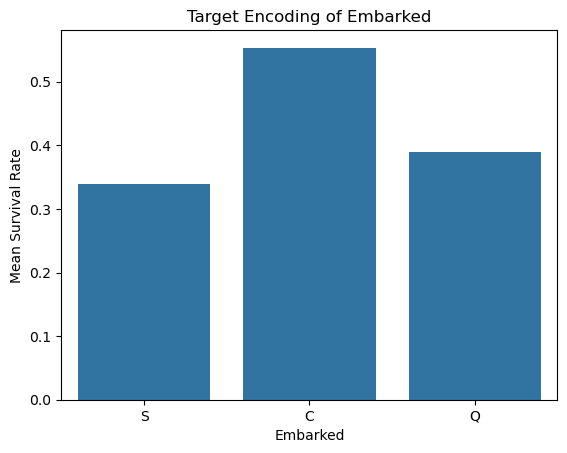

In [262]:
# Target encode 'Embarked'
titanic_target = titanic_data.copy()
target_means = titanic_target.groupby('Embarked')['Survived'].mean()

# Map target means to 'Embarked'
titanic_target['Embarked_Target'] = titanic_target['Embarked'].map(target_means)

# Visualize target encoding
sns.barplot(data=titanic_target, x='Embarked', y='Embarked_Target', ci=None)
plt.title("Target Encoding of Embarked")
plt.ylabel("Mean Survival Rate")
plt.show()

#### Graph Explanation

This bar chart shows the results of target encoding for the Embarked feature in the Titanic dataset. Target encoding replaces each category with the mean survival rate (Survived) for passengers who embarked from each location.

**Key Points:**

- **Categories of Embarked:**

    - S: Passengers who embarked from Southampton have a survival rate of approximately 34%.
    - C: Passengers who embarked from Cherbourg show the highest survival rate at around 55%.
    - Q: Passengers who embarked from Queenstown have a survival rate of about 39%.

- **Insights:**

    - Passengers from Cherbourg had the highest survival probability, possibly due to a higher proportion of first-class passengers. This highlights the relationship between Embarked and Survived, making Embarked an important feature in survival prediction.

- **Causal Considerations:**

    - While target encoding captures the relationship between Embarked and Survived, it may inadvertently encode spurious correlations if not handled carefully (e.g., during cross-validation to prevent leakage).

## **Conclusion**

This notebook explored foundational concepts in causal analysis and demonstrated their application using the Titanic dataset. The key takeaways include:

### **Causality Principles**
- Causality aims to identify directional relationships, distinguishing correlation from cause-and-effect. Causal graphs, represented as Directed Acyclic Graphs (DAGs), were introduced to map variable relationships.
- Understanding confounding, interventions, and conditional independence is critical for isolating true causal effects and ensuring reliable decision-making.

### **Handling Missing Data**
- Proper handling of missing data is essential to avoid distortions in causal relationships. Techniques like deletion, mean/median imputation, and model-based imputation were demonstrated, with an emphasis on respecting the causal structure of the data.
- The distinction between MCAR, MAR, and MNAR missingness mechanisms highlighted the importance of tailoring strategies to the context.

### **Feature Selection in Causal Analysis**
- Feature selection not only improves model performance but also ensures causal interpretability. Statistical methods like mutual information, wrapper techniques like recursive feature elimination, and embedded methods like Lasso were applied to identify relevant features.
- The need to exclude colliders and focus on causal parents of the outcome was emphasized to prevent biased interpretations.

### **Encoding Categorical Variables**
- Categorical variable encoding methods like one-hot encoding, label encoding, and target encoding were compared, highlighting their strengths and weaknesses.
- In causal analysis, encoding choices must align with the variable's causal role to avoid introducing spurious associations or violating causal pathways.

### **Significance of Data Preparation**
This notebook demonstrated how thoughtful data preparation, aligned with causal principles, can improve the robustness and interpretability of machine learning models. By addressing challenges like missing data, selecting meaningful features, and encoding categorical variables carefully, we enhance both model accuracy and its alignment with real-world dynamics.

---

## **References**
1. Pearl, J. (2009). *Causality: Models, Reasoning, and Inference*. Cambridge University Press.
2. Hernán, M. A., & Robins, J. M. (2020). *Causal Inference: What If*. Chapman & Hall/CRC.
3. Scikit-learn Documentation. Available at: [https://scikit-learn.org](https://scikit-learn.org)
4. DoWhy Documentation. Available at: [https://microsoft.github.io/dowhy/](https://microsoft.github.io/dowhy/)
5. Kaggle Titanic Dataset. Available at: [https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic)
6. Articles on causal graphs and d-separation: *Causal Analysis with DAGs* ([https://causalnex.readthedocs.io](https://causalnex.readthedocs.io))
7. Online tutorials and examples for feature selection and categorical encoding: *Towards Data Science* ([https://towardsdatascience.com](https://towardsdatascience.com))

---

## **MIT License**

Copyright (c) 2024 UtkarshaShirke

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
